### 基于鸢尾花（iris）数据集的逻辑回归分类实践

在实践的最开始，我们首先需要导入一些基础的函数库包括：numpy （Python进行科学计算的基础软件包），pandas（pandas是一种快速，强大，灵活且易于使用的开源数据分析和处理工具），matplotlib和seaborn绘图。

**Step1:库函数导入**

In [1]:
##  基础函数库
import numpy as np 
import pandas as pd

## 绘图函数库
import matplotlib.pyplot as plt
import seaborn as sns

本次我们选择鸢花数据（iris）进行方法的尝试训练，该数据集一共包含5个变量，其中4个特征变量，1个目标分类变量。共有150个样本，目标变量为 花的类别 其都属于鸢尾属下的三个亚属，分别是山鸢尾 (Iris-setosa)，变色鸢尾(Iris-versicolor)和维吉尼亚鸢尾(Iris-virginica)。包含的三种鸢尾花的四个特征，分别是花萼长度(cm)、花萼宽度(cm)、花瓣长度(cm)、花瓣宽度(cm)，这些形态特征在过去被用来识别物种。

|  变量   | 描述  |
|  ----  | ----  |
| sepal length  | 花萼长度(cm) |
| sepal width  | 花萼宽度(cm) |
| petal length | 花瓣长度(cm) |
| petal width  | 花瓣宽度(cm) |
| target  | 鸢尾的三个亚属类别,'setosa'(0), 'versicolor'(1), 'virginica'(2)|

**Step2:数据读取/载入**

In [2]:
## 我们利用 sklearn 中自带的 iris 数据作为数据载入，并利用Pandas转化为DataFrame格式
from sklearn.datasets import load_iris
data = load_iris() #得到数据特征
iris_target = data.target #得到数据对应的标签
iris_features = pd.DataFrame(data=data.data, columns=data.feature_names) #利用Pandas转化为DataFrame格式

**Step3:数据信息简单查看**

In [3]:
## 利用.info()查看数据的整体信息
iris_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
sepal length (cm)    150 non-null float64
sepal width (cm)     150 non-null float64
petal length (cm)    150 non-null float64
petal width (cm)     150 non-null float64
dtypes: float64(4)
memory usage: 4.8 KB


In [4]:
## 进行简单的数据查看，我们可以利用 .head() 头部.tail()尾部
iris_features.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
iris_features.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3
149,5.9,3.0,5.1,1.8


In [6]:
## 其对应的类别标签为，其中0，1，2分别代表'setosa', 'versicolor', 'virginica'三种不同花的类别。
iris_target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [10]:
## 利用value_counts函数查看每个类别数量
pd.Series(iris_target).value_counts()

2    50
1    50
0    50
dtype: int64

In [11]:
## 对于特征进行一些统计描述
iris_features.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


从统计描述中我们可以看到不同数值特征的变化范围。

**Step4:可视化描述**

In [12]:
## 合并标签和特征信息
iris_all = iris_features.copy() ##进行浅拷贝，防止对于原始数据的修改
iris_all['target'] = iris_target

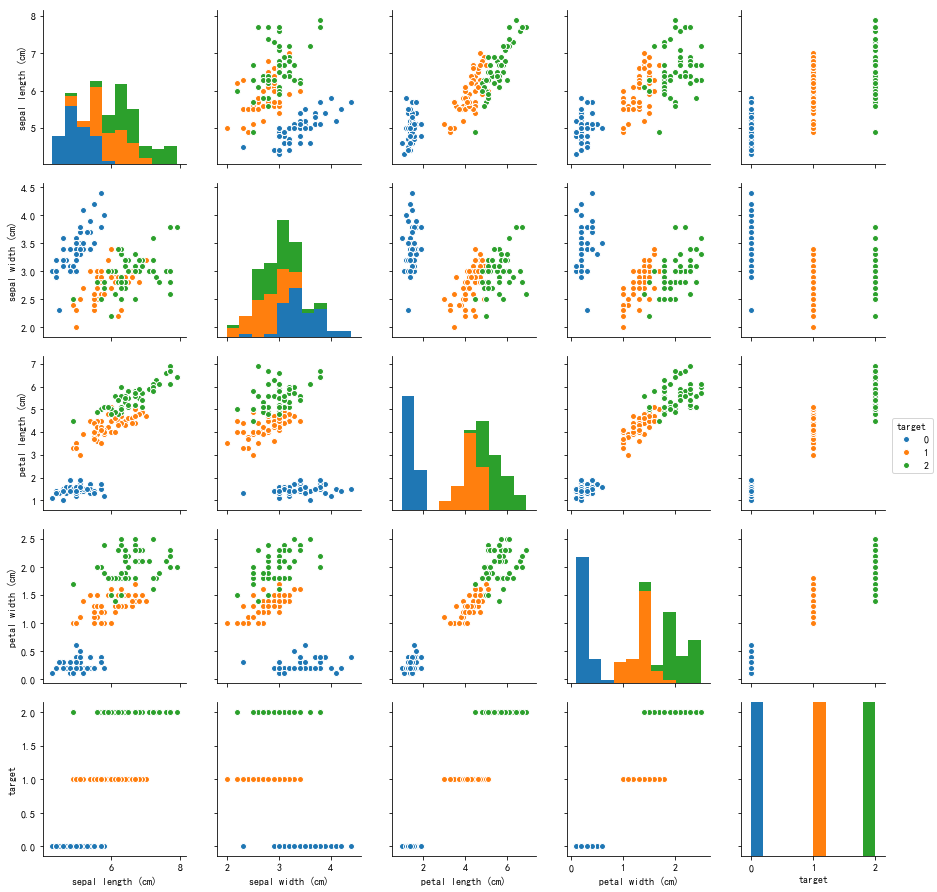

In [13]:
## 特征与标签组合的散点可视化
sns.pairplot(data=iris_all,diag_kind='hist', hue= 'target')
plt.show()

从上图可以发现，在2D情况下不同的特征组合对于不同类别的花的散点分布，以及大概的区分能力。

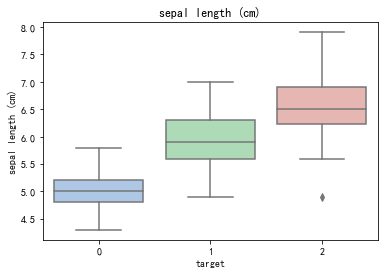

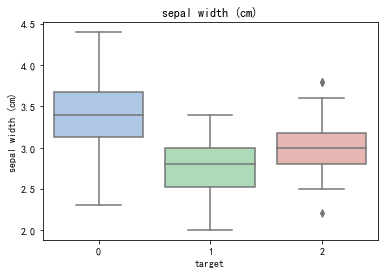

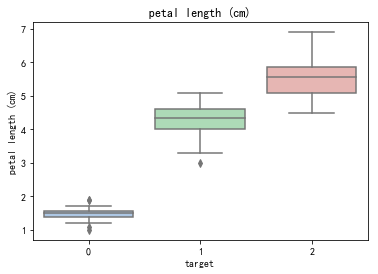

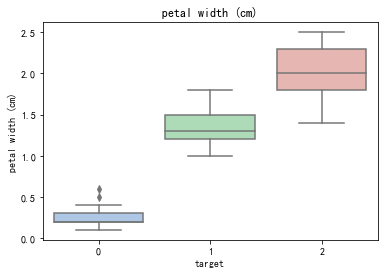

In [14]:
for col in iris_features.columns:
    sns.boxplot(x='target', y=col, saturation=0.5,palette='pastel', data=iris_all)
    plt.title(col)
    plt.show()

利用箱型图我们也可以得到不同类别在不同特征上的分布差异情况。

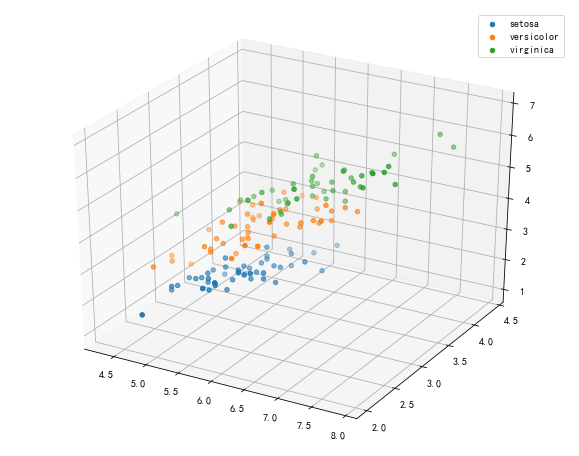

In [15]:
# 选取其前三个特征绘制三维散点图
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

iris_all_class0 = iris_all[iris_all['target']==0].values
iris_all_class1 = iris_all[iris_all['target']==1].values
iris_all_class2 = iris_all[iris_all['target']==2].values
# 'setosa'(0), 'versicolor'(1), 'virginica'(2)
ax.scatter(iris_all_class0[:,0], iris_all_class0[:,1], iris_all_class0[:,2],label='setosa')
ax.scatter(iris_all_class1[:,0], iris_all_class1[:,1], iris_all_class1[:,2],label='versicolor')
ax.scatter(iris_all_class2[:,0], iris_all_class2[:,1], iris_all_class2[:,2],label='virginica')
plt.legend()

plt.show()

**Step5:利用 逻辑回归模型 在二分类上 进行训练和预测**

In [16]:
## 为了正确评估模型性能，将数据划分为训练集和测试集，并在训练集上训练模型，在测试集上验证模型性能。
from sklearn.model_selection import train_test_split

## 选择其类别为0和1的样本 （不包括类别为2的样本）
iris_features_part = iris_features.iloc[:100]
iris_target_part = iris_target[:100]

## 测试集大小为20%， 80%/20%分
x_train, x_test, y_train, y_test = train_test_split(iris_features_part, iris_target_part, test_size = 0.2, random_state = 2020)

In [17]:
## 从sklearn中导入逻辑回归模型
from sklearn.linear_model import LogisticRegression

In [18]:
## 定义 逻辑回归模型 
clf = LogisticRegression(random_state=0, solver='lbfgs')

In [19]:
# 在训练集上训练逻辑回归模型
clf.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='lbfgs', tol=0.0001,
          verbose=0, warm_start=False)

In [20]:
## 查看其对应的w
print('the weight of Logistic Regression:',clf.coef_)

## 查看其对应的w0
print('the intercept(w0) of Logistic Regression:',clf.intercept_)

the weight of Logistic Regression: [[ 0.45244919 -0.81010583  2.14700385  0.90450733]]
the intercept(w0) of Logistic Regression: [-6.57504448]


In [21]:
## 在训练集和测试集上分布利用训练好的模型进行预测
train_predict = clf.predict(x_train)
test_predict = clf.predict(x_test)

The accuracy of the Logistic Regression is: 1.0
The accuracy of the Logistic Regression is: 1.0
The confusion matrix result:
 [[ 9  0]
 [ 0 11]]


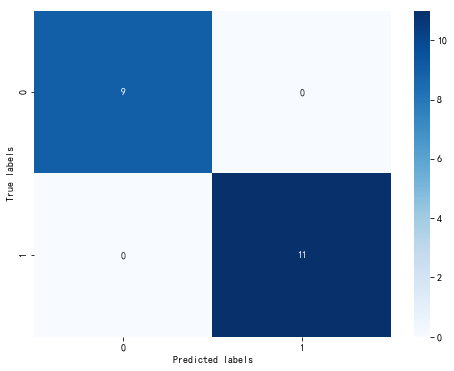

In [22]:
from sklearn import metrics

## 利用accuracy（准确度）【预测正确的样本数目占总预测样本数目的比例】评估模型效果
print('The accuracy of the Logistic Regression is:',metrics.accuracy_score(y_train,train_predict))
print('The accuracy of the Logistic Regression is:',metrics.accuracy_score(y_test,test_predict))

## 查看混淆矩阵 (预测值和真实值的各类情况统计矩阵)
confusion_matrix_result = metrics.confusion_matrix(test_predict,y_test)
print('The confusion matrix result:\n',confusion_matrix_result)

# 利用热力图对于结果进行可视化
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_result, annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

我们可以发现其准确度为1，代表所有的样本都预测正确了。

**Step6:利用 逻辑回归模型 在三分类(多分类)上 进行训练和预测**

In [23]:
## 测试集大小为20%， 80%/20%分
x_train, x_test, y_train, y_test = train_test_split(iris_features, iris_target, test_size = 0.2, random_state = 2020)

In [24]:
## 定义 逻辑回归模型 
clf = LogisticRegression(random_state=0, solver='lbfgs')

In [25]:
# 在训练集上训练逻辑回归模型
clf.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='lbfgs', tol=0.0001,
          verbose=0, warm_start=False)

In [26]:
## 查看其对应的w
print('the weight of Logistic Regression:\n',clf.coef_)

## 查看其对应的w0
print('the intercept(w0) of Logistic Regression:\n',clf.intercept_)

## 由于这个是3分类，所有我们这里得到了三个逻辑回归模型的参数，其三个逻辑回归组合起来即可实现三分类。

the weight of Logistic Regression:
 [[-0.43538857  0.87888013 -2.19176678 -0.94642091]
 [-0.39434234 -2.6460985   0.76204684 -1.35386989]
 [-0.00806312  0.11304846  2.52974343  2.3509289 ]]
the intercept(w0) of Logistic Regression:
 [  6.30620875   8.25761672 -16.63629247]


In [27]:
## 在训练集和测试集上分布利用训练好的模型进行预测
train_predict = clf.predict(x_train)
test_predict = clf.predict(x_test)

## 由于逻辑回归模型是概率预测模型（前文介绍的 p = p(y=1|x,\theta)）,所有我们可以利用 predict_proba 函数预测其概率
train_predict_proba = clf.predict_proba(x_train)
test_predict_proba = clf.predict_proba(x_test)

print('The test predict Probability of each class:\n',test_predict_proba)
## 其中第一列代表预测为0类的概率，第二列代表预测为1类的概率，第三列代表预测为2类的概率。

## 利用accuracy（准确度）【预测正确的样本数目占总预测样本数目的比例】评估模型效果
print('The accuracy of the Logistic Regression is:',metrics.accuracy_score(y_train,train_predict))
print('The accuracy of the Logistic Regression is:',metrics.accuracy_score(y_test,test_predict))

The test predict Probability of each class:
 [[1.32525870e-04 2.41745142e-01 7.58122332e-01]
 [7.02970475e-01 2.97026349e-01 3.17667822e-06]
 [3.37367886e-02 7.25313901e-01 2.40949311e-01]
 [5.66207138e-03 6.53245545e-01 3.41092383e-01]
 [1.06817066e-02 6.72928600e-01 3.16389693e-01]
 [8.98402870e-04 6.64470713e-01 3.34630884e-01]
 [4.06382037e-04 3.86192249e-01 6.13401369e-01]
 [1.26979439e-01 8.69440588e-01 3.57997319e-03]
 [8.75544317e-01 1.24437252e-01 1.84312617e-05]
 [9.11209514e-01 8.87814689e-02 9.01671605e-06]
 [3.86067682e-04 3.06912689e-01 6.92701243e-01]
 [6.23261939e-03 7.19220636e-01 2.74546745e-01]
 [8.90760124e-01 1.09235653e-01 4.22292409e-06]
 [2.32339490e-03 4.47236837e-01 5.50439768e-01]
 [8.59945211e-04 4.22804376e-01 5.76335679e-01]
 [9.24814068e-01 7.51814638e-02 4.46852786e-06]
 [2.01307999e-02 9.35166320e-01 4.47028801e-02]
 [1.71215635e-02 5.07246971e-01 4.75631465e-01]
 [1.83964097e-04 3.17849048e-01 6.81966988e-01]
 [5.69461042e-01 4.30536566e-01 2.39269631e

The confusion matrix result:
 [[10  0  0]
 [ 0  7  3]
 [ 0  3  7]]


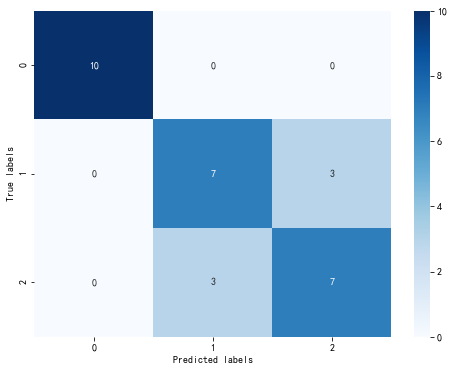

In [28]:
## 查看混淆矩阵
confusion_matrix_result = metrics.confusion_matrix(test_predict,y_test)
print('The confusion matrix result:\n',confusion_matrix_result)

# 利用热力图对于结果进行可视化
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_result, annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

通过结果我们可以发现，其在三分类的结果的预测准确度上有所下降，其在测试集上的准确度为:$86.67\%$，这是由于'versicolor'（1）和 'virginica'（2）这两个类别的特征，我们从可视化的时候也可以发现，其特征的边界具有一定的模糊性（边界类别混杂，没有明显区分边界），所有在这两类的预测上出现了一定的错误。

## 5 重要知识点

逻辑回归 原理简介：

Logistic回归虽然名字里带“回归”，但是它实际上是一种分类方法，主要用于两分类问题（即输出只有两种，分别代表两个类别），所以利用了Logistic函数（或称为Sigmoid函数），函数形式为：
$$ 
logi(z)=\frac{1}{1+e^{-z}} 
$$

其对应的函数图像可以表示如下:

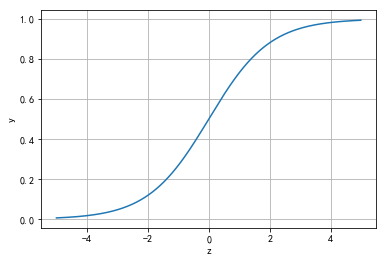

In [29]:
import numpy as np
import matplotlib.pyplot as plt
x = np.arange(-5,5,0.01)
y = 1/(1+np.exp(-x))

plt.plot(x,y)
plt.xlabel('z')
plt.ylabel('y')
plt.grid()
plt.show()

通过上图我们可以发现 Logistic 函数是单调递增函数，并且在z=0的时候取值为0.5，并且$logi(\cdot)$函数的取值范围为$(0,1)$。

而回归的基本方程为$z=w_0+\sum_i^N w_ix_i$，

将回归方程写入其中为：
$$
p = p(y=1|x,\theta) = h_\theta(x,\theta)=\frac{1}{1+e^{-(w_0+\sum_i^N w_ix_i)}}
$$

所以, $p(y=1|x,\theta) = h_\theta(x,\theta)$，$p(y=0|x,\theta) = 1-h_\theta(x,\theta)$

逻辑回归从其原理上来说，逻辑回归其实是实现了一个决策边界：对于函数 $y=\frac{1}{1+e^{-z}}$,当 $z=>0$时,$y=>0.5$,分类为1，当 $z<0$时,$y<0.5$,分类为0，其对应的$y$值我们可以视为类别1的概率预测值.

对于模型的训练而言：实质上来说就是利用数据求解出对应的模型的特定的$w$。从而得到一个针对于当前数据的特征逻辑回归模型。

而对于多分类而言，将多个二分类的逻辑回归组合，即可实现多分类。